In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_date_data = pd.read_csv('./data/org/day.csv')
df_date_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### それぞれのカラムの定義は以下の通り

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week (0:Sunday, 1:Monday)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
	

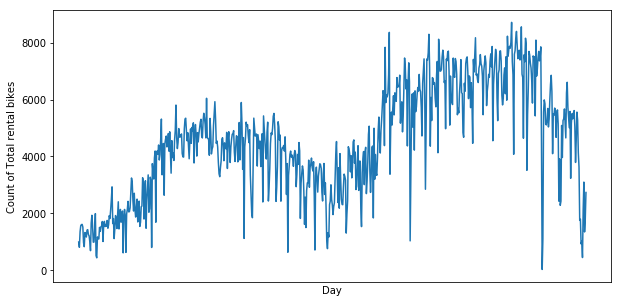

In [3]:
plt.figure(figsize=(10,5))
plt.xlabel('Day')
x_tick_sequence = np.array([i % 30 for i in range(11)])
plt.xticks(ticks=[])
plt.ylabel('Count of Total rental bikes')

plt.plot(df_date_data.dteday, df_date_data.cnt)

今回使用するカラムは以下の通り

In [4]:
used_columns = ['cnt', 'season', 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'hum', 'windspeed']
df = df_date_data.loc[:,used_columns]
df.head()

,cnt,season,yr,mnth,holiday,weathersit,temp,hum,windspeed
0,985,1,0,1,0,2,0.344167,0.805833,0.160446
1,801,1,0,1,0,2,0.363478,0.696087,0.248539
2,1349,1,0,1,0,1,0.196364,0.437273,0.248309
3,1562,1,0,1,0,1,0.200000,0.590435,0.160296
4,1600,1,0,1,0,1,0.226957,0.436957,0.186900


発表の便宜上以下のようにOHEして使用する

In [5]:
ohe_columns = ['season', 'mnth', 'weathersit']
df_ohe = pd.get_dummies(df, columns=ohe_columns)
df_ohe.head()

,cnt,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,985,0,0,0.344167,0.805833,0.160446,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,801,0,0,0.363478,0.696087,0.248539,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1349,0,0,0.196364,0.437273,0.248309,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1562,0,0,0.200000,0.590435,0.160296,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1600,0,0,0.226957,0.436957,0.186900,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
